In [77]:
url='https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-11-08.xlsx' ;
urlwrite(url,'updated_data.xlsx');

In [78]:
%Données
[I,TXT]=xlsread('updated_data.xlsx');
[i,j]=find(TXT=="France");
Mort = I(i,6); 
Cas = I(i,5);
Date = I(i, 2:4);
Cas = Cas(end:-1:1);
Date = Date(end:-1:1);
Mort = Mort(end:-1:1);


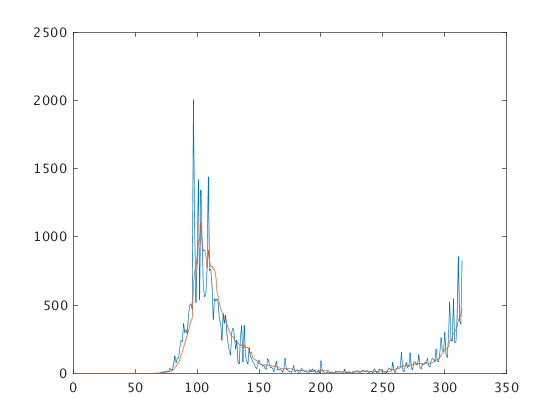

In [79]:
% moyenne mobile 7 jours pour lisser la courbe %
MoyMobil=zeros(size(Mort));
for i=1:length(Mort)
    MoyMobil(i)=mean(Mort(max(1,i-6):i));
end
plot(1:length(Mort),Mort,1:length(Mort),MoyMobil)

In [80]:
%%file SIRD_bt.m
function ypoint = SIRD_bt(t,y)
 
  global beta gamma mu
 
  ypoint=zeros(size(y));
  ypoint(1) = -beta(t)*y(1)*y(2);
  ypoint(2) = beta(t)*y(1)*y(2)-(gamma+mu)*y(2);
  ypoint(3) = gamma*y(2);
  ypoint(4) = mu*y(2);
  
end

Created file '/home/adrien.dauphin/TP3 SIR/SIRD_bt.m'.


In [73]:
%%file normeL2_bt.m
function out = normeL2_bt(param)
    
    global beta gamma mu Mort_data I0 Tf
    
    % def de Beta
    Tf = length(Mort_data)-1;  %temps final
    T = linspace(0, Tf, length(param));
    beta =  @(t) interp1(T, param ,t) ;
    

    % Conditions initiales
    y2 = I0/67012883;    
    y1 = 1-y2;
    y3 = 0;
    y4 = 0;

    [t,y] = ode45(@SIRD_bt , [0:Tf], [y1 y2 y3 y4]);
    D = y(:,4);
    D = D(1:end) - [0 ; D(1:end-1)];

    out = norm(D-Mort_data);

end

Created file '/home/adrien.dauphin/TP3 SIR/normeL2_bt.m'.



Local minimum possible.

fminunc stopped because it cannot decrease the objective function
along the current search direction.





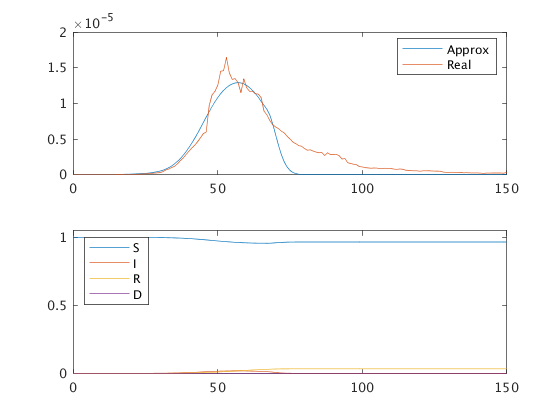

In [103]:
% Paramètres
global beta gamma mu Mort_data I0 Tf
I0 = 500 ;
gamma = 1/14 ;
mu = 0.01/14 ;
Mort_data = MoyMobil(50:200)/67012883;

%détermination de beta(t)
fminunc(@normeL2_bt,  0.2*ones(1,10)); % Première approx de beta


% Conditions initiales
y2 = I0/67012883;    
y1 = 1-y2;
y3 = 0;
y4 = 0;

[t,y] = ode45(@SIRD_bt , [0:Tf], [y1 y2 y3 y4]);
S = y(:,1);    % Extraction
I = y(:,2);
R = y(:,3);
D = y(:,4);
D_day = D(1:end) - [0 ; D(1:end-1) ];

subplot(2,1,1);
plot(t,D_day, t,Mort1)
ylim([0 , 2*10^(-5)])
legend('Approx','Real','Location','northeast')

subplot(2,1,2); 
plot(t,S, t,I, t,R, t,D)
ylim([0 , 1.05])
legend('S','I','R','D','Location','northwest')

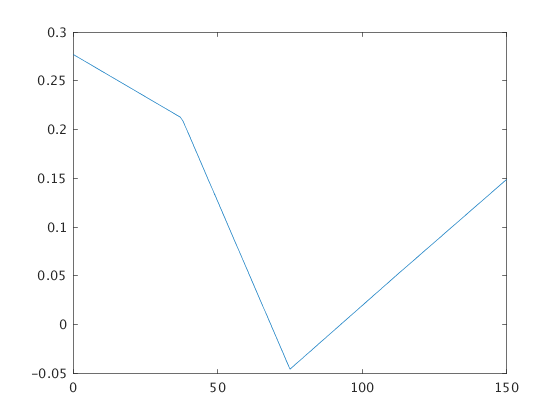

In [102]:
plot(t,beta(t))